This project examines whether self-reported academic pressure differs between male and female university students. Academic pressure is conceptualised as students subjective perceptions of study-related stress and is measured using a Likert-scale response format.The central question for this report is: Do self-reported levels of academic pressure differ between male and female university students? 

During the process of selecting an appropriate dataset, several potential sources of student experience data were considered, such as the national surveys from the UK National Student Survey (NSS) https://www.officeforstudents.org.uk/data-and-analysis/national-student-survey-data/. These data sets are rich in population level information, however wilst inspecting i noticed that the volume and complexity of these datasets make them less suitable for targeted inferential analysis. Futhermore, datasets like the NSS seem to be structured to support institutional evaluation making them less suitable for focused indivudial analysis.

The dataset used in the present analysis was selected because it provides a clearly defined, single-item Likert-scale measure of academic pressure alongside relevant demographic information, with no missing observations. Although more simplisitic, this structure allows for a clearer and more transparent application of non-parametric and permutation-based statistical analyses.

Before addressing the research question directly, it is necessary to prepare and explore the dataset to ensure that the variables of interest are suitable for comparison. This includes confirming that the data have been read correctly, identifying any missing or invalid responses, and examining the overall distribution of stress scores. These steps are essential for choosing appropriate statistical methods and for interpreting any observed differences responsibly.

# Run this cell first 

In [34]:
# Cell 1: import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [35]:

# Cell 2: load data

df = pd.read_csv('academic_pressure csv.csv')
df.head()



,Gender,Academic Pressure
0,Male,2
1,Male,4
2,Male,1
3,Male,1
4,Female,1


The dataset was loaded from a CSV file containing demographic information and self-reported measures of academic pressure from https://www.opendatabay.com/data/healthcare/087fc94b-b45c-4d19-a5d8-260680c43b28 The dataset originates from a published study (Nguyen, M.-H., Ho, M.-T., Nguyen, Q.-Y. T., & Vuong, Q.-H., 2019), available via DOI: https://doi.org/10.3390/data4030124 
Displaying the first few rows allows confirmation that the data were imported correctly and that the relevant variables are present

Before conducting any statistical analysis, the dataset was inspected to understand its structure, variable types, and overall quality. This step ensures that the data are suitable for analysis and helps identify any potential issues, such as missing values or inappropriate data types, that could affect the validity of later results.

In [36]:
# Cell 3 : data inspection 
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             502 non-null    object
 1   Academic Pressure  502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


,Gender,Academic Pressure
count,502,502.000000
unique,2,NaN
top,Male,NaN
freq,267,NaN
mean,NaN,3.003984
std,NaN,1.390007
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,4.000000


The output showed that the dataset contains 502 complete observations, with no missing data. Gender is a categorical variable, while Academic Pressure is stored as a numerical variable.Descriptive statistics reflect the mixed variable types in the dataset, with categorical summaries reported for gender and numerical summaries reported for academic pressure; NaN values appear where statistics are not applicable to a given variable type.Academic Pressure was measured on a 1–5 Likert scale, with a mean score of approximately 3, indicating moderate levels of perceived academic stress in the sample. The dataset includes two gender categories.

The dataset was then cleaned and prepared to ensure the variables were suitable for statistical analysis and aligned with the research question. Column names were renamed using concise, lowercase labels to improve readability and reduce the likelihood of coding errors.

The dataset was then restricted to the two variables of interest: gender and academic pressure. Gender labels were standardised to ensure consistency, and academic pressure values were explicitly converted to numeric format to allow quantitative analysis. Rows containing missing values were removed, and the analysis was limited to male and female participants to enable a direct group comparison.

In [37]:
#Cell 4 : Data cleaning 
df = df.rename(columns={
    "Gender": "gender",
    "Academic Pressure": "academic_pressure"
})

In [38]:
df = df[["gender", "academic_pressure"]]

df["gender"] = df["gender"].str.strip().str.title()
df["academic_pressure"] = pd.to_numeric(df["academic_pressure"], errors="coerce")

df = df.dropna()
df = df[df["gender"].isin(["Male", "Female"])]


In [39]:
df.groupby("gender")["academic_pressure"].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,235.0,3.021277,1.394270,1.0,2.0,3.0,4.0,5.0
Male,267.0,2.988764,1.388685,1.0,2.0,3.0,4.0,5.0



Overall, the descriptive statistics indicate very similar levels of academic pressure across genders. Female students reported a mean academic pressure score of 3.02, while male students reported a mean score of 2.99. The congruent means and standard deviations suggest minimal observable differences between the two groups at the descriptive level, motivating the need of inferential statistical to precisely assess whether any meaningful gender difference exists.

An interesting point to note is the slight imbalance in group sizes, with 267 male participants and 235 female participants. While this difference is relatively small and unlikely to substantially influence the descriptive statistics, it is a characteristic of the sample that should be acknowledged when interpreting the results.

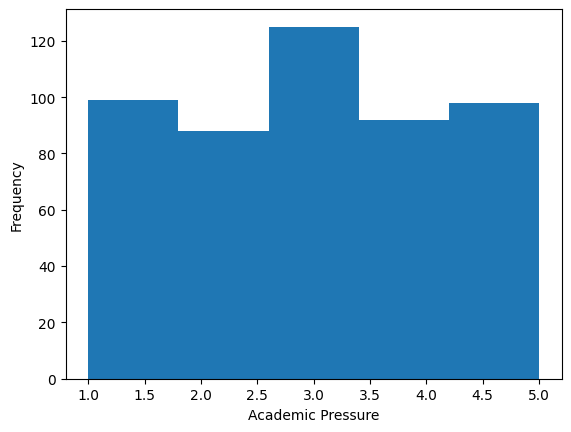

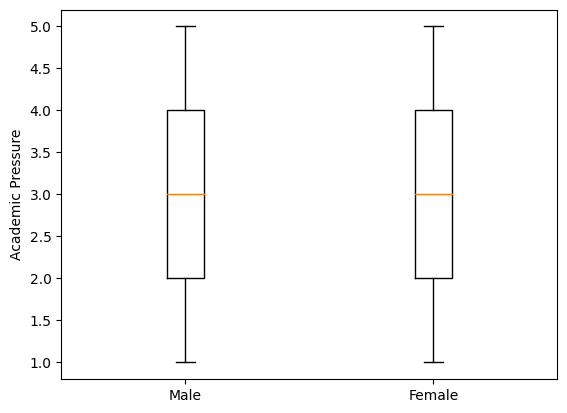

In [40]:
#cell 5: Visual comparison of Academic Stress by Gender using Histogrmas and Box Plots 
plt.hist(df["academic_pressure"], bins=5)
plt.xlabel("Academic Pressure")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(
    [df[df["gender"]=="Male"]["academic_pressure"],
     df[df["gender"]=="Female"]["academic_pressure"]],
    labels=["Male", "Female"]
)
plt.ylabel("Academic Pressure")
plt.show()


Figure 1: Histogram of acadmeic pressure scores across all participants

Figure 2: Boxplot comparing academic pressure scores between male and female participants 

Two visualisations were used to explore the distrubutions of academic pressure. Figure 1 presents a histogram showing the overall distribution of stress ratings, with most students reporting moderate pressure (score = 3).
Figure 2 show the boxplot comparison between male and female students and shows highly similar medians and spreads indicating little visible difference between gender groups. We can infer from these descriptive statitics that the results were non-significant. 

A permutation test was used as the primary inferential analysis to assess whether academic pressure differs between male and female students.
This approach was chosen because academic pressure was measured using a Likert scale, making the data ordinal and potentially non-normal, which limits the suitability of classical parametric tests.

The observed difference in mean academic pressure between female and male students was first calculated. Gender labels were then randomly shuffled 5000 times, and the mean difference was recalculated for each permutation to generate a null distribution representing differences expected by chance alone.

In [41]:
#Cell 6: Permutation Testing 
male = df[df["gender"]=="Male"]["academic_pressure"]
female = df[df["gender"]=="Female"]["academic_pressure"]



In [42]:
obs_diff = female.mean() - male.mean()
combined = np.concatenate([female, male])
n_f = len(female)

n_perm = 5000
perm_diffs = []

for i in range(n_perm):
    perm = np.random.permutation(combined)
    perm_f = perm[:n_f].mean()
    perm_m = perm[n_f:].mean()
    perm_diffs.append(perm_f - perm_m)

p_perm = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
obs_diff, p_perm


(0.032512550800860573, 0.8026)

The permutation test revealed no evidence of a difference in academic pressure between males and females (p = 0.789). The observed mean difference was small (M = 0.03), indicating negligible practical significance.

A Mann Whitney U test was conducted in ordedr to compare academic pressure scores between female and male students as a non-parametric alternative to the independent samples t-test.

This test is appropriate because academic pressure is measured on an ordinal Likert scale and normality assumptions may not be have been  met. The test assesses whether the distribution of scores differs between the two gender groups.

In [43]:
#Cell 7: Non Parametic group comparison (Mann-Whitney U ) 
u_stat, p_u = stats.mannwhitneyu(female, male, alternative="two-sided")
u_stat, p_u


(31832.0, 0.7724443834310951)

The Mann–Whitney U test returned a non-significant p-value (p > .05), indicating that there is no evidence of a difference in academic pressure scores between male and female students

The histogram is a demonstartion of the permutation distribution of mean differences in academic pressure between female and male students under the null hypothesis that gender has no effect.


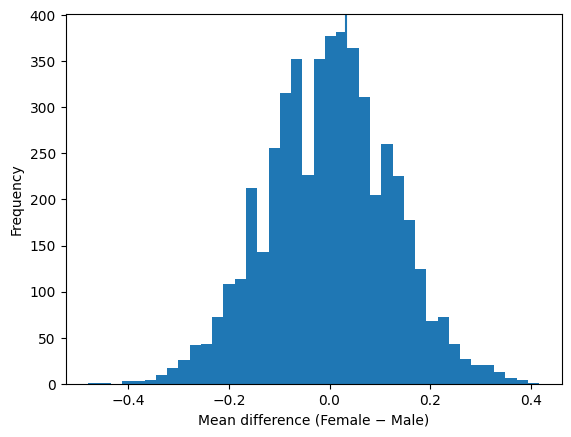

In [44]:
plt.hist(perm_diffs, bins=40)
plt.axvline(obs_diff)
plt.xlabel("Mean difference (Female − Male)")
plt.ylabel("Frequency")
plt.show()


Figure 3: Historgram of mean differences from permatution tesing

The histogram represents the null distribution of the mean differences in academic pressure scores between female and male students generated through the
permutation testing. 
The x axis shows the range of mean differences, while the y-axis shows the frequency of those differences across 5000 permutations. The vertical line indicates the observed mean difference between the two groups. As seen, the observed difference (close to zero) lies near the center of the distribution, suggesting there is no significant difference between genders in academic pressure

Overall, both the permutation test and the Mann–Whitney U test provide converging evidence that there is no meningful difference in academic pressure between male and female students in this dataset While small differences in mean scores were observed, these differences are well within the range expected under random variation, and there is no statistical evidence to support a gender-based disparity in academic pressure.

| Term | Meaning |
|------|---------|
| Academic Pressure | Self-reported measure of perceived study-related stress measured on a 1–5 Likert scale |
| Permutation Test | A non-parametric resampling method that evaluates the null hypothesis by repeatedly shuffling group labels |
| Mann–Whitney U Test | A non-parametric test used to compare two independent groups when data are ordinal or non-normally distributed |


References: 

Student Wellbeing and Academic Success Survey Data CSV Download Free | Open Data Marketplace. (2025). Opendatabay.com. https://www.opendatabay.com/data/healthcare/087fc94b-b45c-4d19-a5d8-260680c43b28

Nguyen, M.-H., Ho, M.-T., Nguyen, Q.-Y. T., & Vuong, Q.-H. (2019). A Dataset of Students’ Mental Health and Help-Seeking Behaviors in a Multicultural Environment. Data, 4(3), 124. https://doi.org/10.3390/data4030124

Office for Students. (2023, August 10). National Student Survey Data - Office for Students. Www.officeforstudents.org.uk. https://www.officeforstudents.org.uk/data-and-analysis/national-student-survey-data/
